In [22]:
#TFRecord 文件可视化

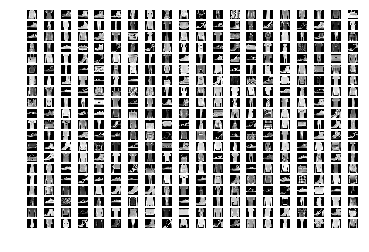

In [21]:
import tensorflow as tf  
import matplotlib.pyplot as plt
import PIL
import numpy as np

# 创建一个reader来读取TFRecord文件中的样例
reader = tf.TFRecordReader()  
# 通过 tf.train.string_input_producer 创建输入队列
filename_queue = tf.train.string_input_producer(["/home/miles/MNIST/data/output.tfrecords"])  
# 从文件中读取一个样例
_, serialized_example = reader.read(filename_queue)  
# 解析读入的一个样例
features = tf.parse_single_example(  
    serialized_example,  
    features={  
        # 这里解析数据的格式需要和上面程序写入数据的格式一致
        'image_raw': tf.FixedLenFeature([], tf.string),  
        'pixels': tf.FixedLenFeature([], tf.int64),  
        'label': tf.FixedLenFeature([], tf.int64),  
    })  
# tf.decode_raw可以将字符串解析成图像对应的像素数组
images = tf.decode_raw(features['image_raw'], tf.uint8)  
# tf.cast可以将传入的数据转化为想要改成的数据类型
labels = tf.cast(features['label'], tf.int32)
pixels = tf.cast(features['pixels'], tf.int32)  

sess = tf.Session()  
# 启动多线程处理输入数据
coord = tf.train.Coordinator()  
threads = tf.train.start_queue_runners(sess=sess, coord=coord)  
  
# 每次运行可以读取TFRecord文件中的一个样例。当所有样例都读完之后，再次样例中的程序会重头读取
for i in range(1,401):  
    image, label, pixel = sess.run([images, labels, pixels])  
    image = np.reshape(image, [28, 28])
    plt.figure(1)
    plt.subplot(20, 20, i)
    plt.imshow(image, cmap=plt.cm.gray)
plt.show()